In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from tensorboardX import SummaryWriter

import data_loader
from two_layer_model import TwoLayerNet
from three_layer_model import ThreeLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# load data
data_set = data_loader.read_data_sets("./mnist/")

train = data_set.train
val = data_set.validation
test = data_set.test

x = train.images
y = train.labels
x_val = val.images
y_val = val.labels
x_test = test.images
y_test = test.labels

print(x.shape, y.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(55000, 1, 28, 28) (55000,)
(5000, 1, 28, 28) (5000,)
(10000, 1, 28, 28) (10000,)


In [3]:
from two_layer_model import TwoLayerNet

np.random.seed(1)
net = TwoLayerNet()

In [4]:
stats = net.train(x, y, x_val, y_val, batch_size=200, lr=1e-1, reg=1e-4, epoch=1)

epoch 1 -------------------------------
iteration 0 / 275: loss 2.312680
iteration 10 / 275: loss 2.269220
iteration 20 / 275: loss 2.154286
iteration 30 / 275: loss 1.558371
iteration 40 / 275: loss 1.416620
iteration 50 / 275: loss 0.876979
iteration 60 / 275: loss 0.711575
iteration 70 / 275: loss 0.865554
iteration 80 / 275: loss 0.448375
iteration 90 / 275: loss 0.526452
iteration 100 / 275: loss 0.433751
iteration 110 / 275: loss 0.608312
iteration 120 / 275: loss 0.479294
iteration 130 / 275: loss 0.570276
iteration 140 / 275: loss 0.288430
iteration 150 / 275: loss 0.404183
iteration 160 / 275: loss 0.360579
iteration 170 / 275: loss 0.177212
iteration 180 / 275: loss 0.237754
iteration 190 / 275: loss 0.270546
iteration 200 / 275: loss 0.374272
iteration 210 / 275: loss 0.272119
iteration 220 / 275: loss 0.369036
iteration 230 / 275: loss 0.200001
iteration 240 / 275: loss 0.258875
iteration 250 / 275: loss 0.189052
iteration 260 / 275: loss 0.152569
iteration 270 / 275: loss 

In [5]:
# test
test_pred, test_scores = net.predict(x_test)

In [6]:
# plot top-3 images with probability

scores_dict = defaultdict(list)
for i in range(len(test_pred)):
    scores_dict[test_pred[i]].append((test_scores[i], i))

# print(scores_dict)

top_3_dict = defaultdict(list)
for key in scores_dict.keys():
    values = scores_dict[key]
    values.sort(key=lambda x: x[0], reverse=True)
    top_3_dict[key].extend(values[:3])

In [7]:
# tensorboard - top 3 images

writer = SummaryWriter(logdir='logs/scratch_new')

for i in range(10):
    top_3_values = top_3_dict[i]
    for j in range(3):
        best_img = np.reshape(x_test[top_3_values[j][1]], (1, 28, 28))
        title = 'two_layer_class_' + str(i) + "_" + str(j) + '/prob_' + str(round(top_3_values[j][0], 5))
        writer.add_image(title, best_img)

writer.close()

Text(69.0, 0.5, 'True label')

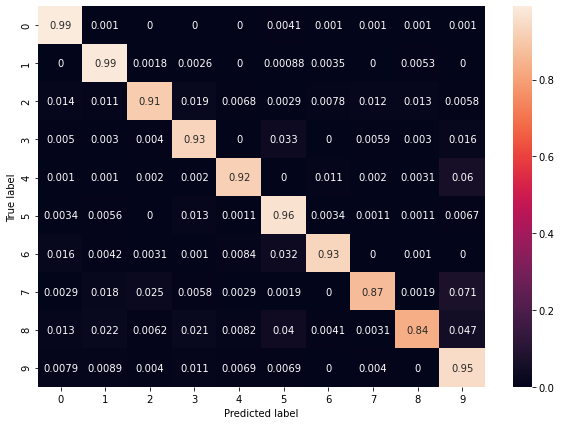

In [8]:
# confusion matrix
confusion = confusion_matrix(y_test, test_pred)
confusion = confusion.astype(np.float) / confusion.astype(np.float).sum(axis=1, keepdims=True)

df = pd.DataFrame(confusion, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [9]:
from three_layer_model import ThreeLayerNet

np.random.seed(3)
net_2 = ThreeLayerNet(scale=1e-1)

In [10]:
stats_2 = net_2.train(x, y, x_val, y_val, batch_size=200, lr=2e-1, reg=1e-5, epoch=1)

epoch 1 -------------------------------
iteration 0 / 275: loss 2.305648
iteration 10 / 275: loss 2.298141
iteration 20 / 275: loss 2.293038
iteration 30 / 275: loss 2.275671
iteration 40 / 275: loss 2.240658
iteration 50 / 275: loss 1.975742
iteration 60 / 275: loss 1.899599
iteration 70 / 275: loss 1.701597
iteration 80 / 275: loss 0.689313
iteration 90 / 275: loss 1.401923
iteration 100 / 275: loss 0.509049
iteration 110 / 275: loss 0.500688
iteration 120 / 275: loss 0.541076
iteration 130 / 275: loss 0.554920
iteration 140 / 275: loss 0.249039
iteration 150 / 275: loss 0.235217
iteration 160 / 275: loss 0.312486
iteration 170 / 275: loss 0.115300
iteration 180 / 275: loss 0.162341
iteration 190 / 275: loss 0.205546
iteration 200 / 275: loss 0.244856
iteration 210 / 275: loss 0.185913
iteration 220 / 275: loss 0.292307
iteration 230 / 275: loss 0.145122
iteration 240 / 275: loss 0.187344
iteration 250 / 275: loss 0.064765
iteration 260 / 275: loss 0.070177
iteration 270 / 275: loss 

In [11]:
# test
test_pred_2, test_scores_2 = net_2.predict(x_test)

In [12]:
# plot top-3 images with probability

scores_dict = defaultdict(list)
for i in range(len(test_pred_2)):
    scores_dict[test_pred_2[i]].append((test_scores_2[i], i))

# print(scores_dict)

top_3_dict = defaultdict(list)
for key in scores_dict.keys():
    values = scores_dict[key]
    values.sort(key=lambda x: x[0], reverse=True)
    top_3_dict[key].extend(values[:3])

In [13]:
# tensorboard - top 3 images

writer = SummaryWriter(logdir='logs/scratch_new')

for i in range(10):
    top_3_values = top_3_dict[i]
    for j in range(3):
        best_img = np.reshape(x_test[top_3_values[j][1]], (1, 28, 28))
        title = 'three_layer_class_' + str(i) + "_" + str(j) + '/prob_' + str(round(top_3_values[j][0], 5))
        writer.add_image(title, best_img)

writer.close()

Text(69.0, 0.5, 'True label')

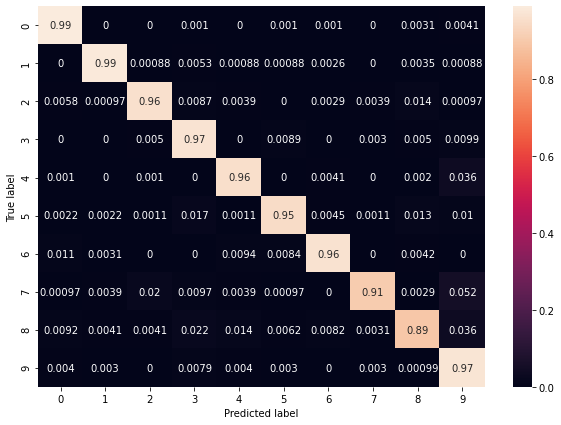

In [14]:
# confusion matrix
confusion = confusion_matrix(y_test, test_pred_2)
confusion = confusion.astype(np.float) / confusion.astype(np.float).sum(axis=1, keepdims=True)

df = pd.DataFrame(confusion, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")